In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

try:
    import QOL.plots as pqol #Sam's custom plotting stuff.
    pqol.fixfigsize((1,1))   #make default figsize small
    pqol.scale_fonts((2,2))  #make default fontsize small
except:
    print('pqol not loaded, defaulting to matplotlib.pyplot.')
    pqol=plt
    
import ImageProcessing as ip #ProjectOAK file with image processing functions.
import  DataProcessing as dp #ProjectOAK file with data  processing functions.
#''' #comment this line if actively editting ImageProcessing.py or DataProcessing.py, to force reloads.
from importlib import reload 
reload(ip)
reload(dp)
#''';

## Pokemon constants:
NTYPES = 18
#enter file locations here
IMAGESFOLDER = dp.IMAGESFOLDER1
IMAGESFOLDERJ = dp.IMAGESFOLDER1J

# Begin work with first image dataset
~2MB, 1 image for each poke in first 7 generations, 120x120 pix resolution.  

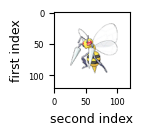

In [3]:
## load image - example
imgdata = ip.get_image('beedrill', folder=dp.IMAGESFOLDER1, ext='.png') #chosen because it has nontrivial alpha values on its wings.
plt.imshow(imgdata)
plt.ylabel('first index')
plt.xlabel('second index')
plt.show()

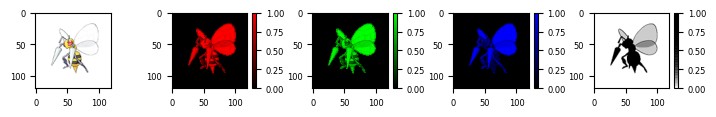

In [4]:
## show image in true color channels, because we can.
ip.show_rgba(imgdata, figsize=(7,1))
plt.show()

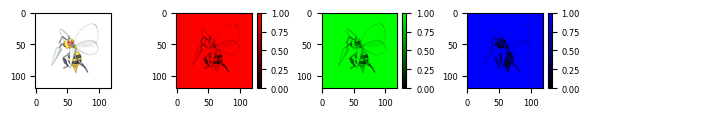

In [5]:
## a few images were jpgs (only 3 channels rgb). so we convert 4-channels to 3-channels here.
ip.show_rgb(imgdata, figsize=(7,1))
plt.show()

# Put images into dict with pokemon names as keys!

In [6]:
#allimages = ip.get_all_images(IMAGESFOLDER0) #could run this, but really we want to load from IMAGESFODLERJ. See below.

### Some images were jpgs, others were pngs. Convert all to jpgs.

In [7]:
#ip.save_all_as_jpgs(IMAGESFOLDER0, IMAGESFOLDERJ) #only need to run this once, ever.

### Put all jpgs into dict with pokemon names as keys

In [8]:
allimages = ip.get_all_images(IMAGESFOLDERJ) #this now has all the jpg images in it! hurray!

got all 809 images in  0.53 seconds (from folder = dataset/images/image_jpgs)


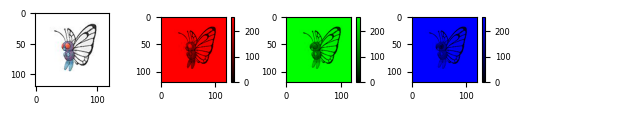

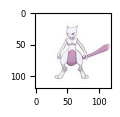

shape (120, 120, 3) | max 255 | min 45


In [9]:
#for example:
ip.show_rgb(allimages['butterfree'], figsize=(6,1))
plt.show()
plt.imshow(allimages['mewtwo'])
plt.show()
im = allimages['mewtwo']
print('shape',im.shape,'| max',im.max(),'| min',im.min())

# Artificially change shape of images.
Folder name stored in `IMAGESFOLDER2J` variable

In [1]:
import PIL

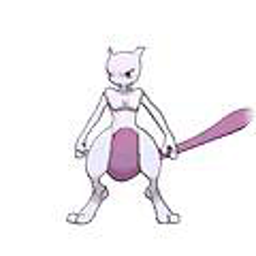

In [22]:
PIL.Image.fromarray(np.uint8(ip.rescaled(im, [0,255]))).resize((256, 256))

<module 'ImageProcessing' from '/Users/Sevans/Python/ProjectOAK/ImageProcessing.py'>

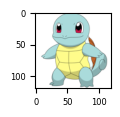

In [22]:
folder = 'dataset/images/dataset150/Squirtle/'
imname1 = '3acb4f11b6424702bf3d7e4105603d60.jpg'
imname2 = 'e2a169374f3248ceb336bd7870cde803.jpg'
imname3 = '00000016.png'
plt.imshow(ip.resize_image(ip.img_to_rgb(ip.get_image_and_poke(imname3, folder=folder)[0]), (120,120)))
reload(ip)

In [13]:
#IMS = ip.get_all_images(folder, verbose=False)

got all 280 images in 10.40 seconds (from folder = dataset/images/dataset150/Squirtle/)


In [52]:
#list(IMS.values())[0].shape

(1105, 1024, 3)

In [20]:
squ = ip.get_some_images_and_reshape(folder)

.. getting image 18
failed to get image: 00000192.png
.. getting image 43
Got  50 of the 280 images in  4.48 seconds (from folder = dataset/images/dataset150/Squirtle/).


In [75]:
reload(ip)

<module 'ImageProcessing' from '/Users/Sevans/Python/ProjectOAK/ImageProcessing.py'>

In [77]:
direc = 'dataset/images/dataset150/'
allimages3 = ip.images_from_folders_in_dir(direc, some=2, verbose=False)

Loading up to  2 images from each folder. Set kwarg "some" to another value to change this number.
Finished in 10.31 seconds.                                                      


In [78]:
allimages3['Beedrill'].shape

(2, 240, 240, 3)

In [9]:
960/240

4.0

In [47]:
import time

In [70]:
for i in [100,55,7,8889,11]:
    print(i, end='')
    time.sleep(0.5)
    print('\r'+' '*80+'\r',end='')

In [2]:
direc = 'dataset/scraped/'
allimages4 = ip.images_from_folders_in_dir(direc, some=3, Nf=3)

Loading up to  3 images from each folder. Set kwarg "some" to another value to change this number.
Finished in  0.04 seconds.    


In [4]:
allimages4.keys()

dict_keys(['Abra', 'Aerodactyl', 'Aipom'])

In [14]:
def take_pre(s):
    '''takes prefix from s. e.g. s='078-test.png' -> return ['078', 'test.png']'''
    Ipre = 3
    return s[:Ipre], s[Ipre+1:]

def take_ext(s):
    '''takes extension from s. e.g. s='test.png' -> return ['test', 'png']'''
    try:
        Iext = -(s[::-1].index('.')+1)
        return s[:Iext], s[Iext+1:]
    except:
        print("didn't find '.' in s=",s)
        raise

In [258]:
class NamesList:
    '''class for manipulating list of names from folder.
    
    ---- main conveniences / reason to use this class ----
    Apply blacklists based on file names, so that images can be excluded according to certain rules.
    Get list of which images are shiny versions of pokemon.
    Get list of which images correspond to different forms (e.g. Mega evolution, Gigantamax, Alolan, Galar, Primal).
    
    ---- basic usage of this class; example ----
    x=NameList('pokemon', directory, number=N)
    x.get_files()   #list of which files haven't been blacklisted by default blacklists
    x.get_shinies() #list of which files are images of shiny versions of pokemon
    x.get_megas()   #list of which files are images of mega versions of pokemon
    
    ---- helpful hints ----
    You can use kwarg "csvdata" to have the number be calculated automatically, instead of passing it.
        This uses poke_to_N from file DataProcessing.py. If you don't have this file, just don't use kwarg csvdata.
        If number is passed, csvdata will be ignored.
        Example: x=NameList('Jirachi', directory, csvdata=csvdata)
    
    ---- advanced usage below ----
    For exploration of which images to use, you can use blacklist_defaults=False,
        then apply blacklists of your choosing.
    Each blacklist simply edits the variable self.idx, but does not change the data stored in this object.
    
    self.files = full names of files as stored in folders. (ignores 'hidden' files, i.e. files starting with '.')
    self.pre   = prefixes of files in folders == file image number on webpage when downloaded.
    self.ext   = extensions of images (e.g. 'png' or 'jpg').
    self.names = names of images without prefix and extension.
    self.comps = components of name (split by '_') (e.g. 'Spr_3e_063' -> ['Spr', '3e', '063'])
    self._idx  = np.arange(len(self.files))
    self.idx   = idx of files which have not been blacklisted by any applied blacklists.
    
    ---- alternate call signature ----
    You can initialize using a list of files, rather than a pokemon name and directory:
    x=NameList(['list','of','file','names'], False)
    You may optionally pass the kwarg 'name' to inform NameList of pokemon name, e.g.:
    x=NameList(['list','of','file','names'], False, name='Jirachi', number=385)
    (Some of the default blacklisting of NameList can only be done if pokemon name and number are known.)
    '''
    def __init__(self, pokemon, direc, number=None, **kwargs):
        if direc is not False:
            self.pokemon = pokemon
            self.files   = sorted([f for f in os.listdir(os.path.join(direc, pokemon)) if not f.startswith('.')])
        else:       #alternate call signature; order of inputs is messed up a bit but it's fineeee
            self.pokemon = kwargs.pop('name', None)
            self.files   = pokemon
        self._init_funcs(number=number, **kwargs)
                
    def _init_funcs(self, number=None, blacklist_defaults=True, blacklist_forms=True, csvdata=None):
        '''initial functions, once self.files is set.'''
        if number is not None: self.number=number
        else:
            if csvdata is not None:
                import DataProcessing as dp
                self.number = dp.poke_to_N(self.pokemon, csvdata)
            else:
                self.number=None
        if self.number is not None: self.number = str(self.number).zfill(3)
        
        took_pre   = [take_pre(s) for s in self.files]
        self.pre   = [x[0] for x in took_pre] 
        self.sites = [x[1] for x in took_pre]
        took_ext   = [take_ext(s) for s in self.sites]
        self.ext   = [x[1] for x in took_ext]
        self.names = [x[0] for x in took_ext]
        self.comps = [x.split('_') for x in self.names]
        self._idx  = np.arange(len(self.files))
        self.idx   = np.arange(len(self.files))
        if blacklist_defaults:
            self.blacklist_defaults()
        if blacklist_forms:
            self.blacklist_forms()
        
    ## "get" methods ##
    
    def get(self, attr='files'):
        '''returns self.attr, indexed by idx'''
        a = getattr(self, attr)
        return [a[i] for i in self.idx]
    
    def get_files(self): return self.get('files')
    def get_names(self): return self.get('names')
    
    
    ## some pre-defined blacklists ##
    
    def blacklist_sprites(self):    self._blacklist_comp('Spr')
    def blacklist_backs(self):      self._blacklist_i(self.get_backs()  )
    def blacklist_shinies(self):    self._blacklist_i(self.get_shinies())
    def blacklist_megas(self):      self._blacklist_i(self.get_megas()  )
    def blacklist_gigas(self):      self._blacklist_i(self.get_gigas()  )
    def blacklist_alola(self):      self._blacklist_i(self.get_forms()['alola'])
    def blacklist_longnames(self, long=30):  self._blacklist_names(lambda base: len(base)>long)
        
    def blacklist_defaults(self):
        self.blacklist_backs()
        self.blacklist_longnames(30)
        self.blacklist_misc()
        if not self.number is None: self.blacklist_orig_reqs()
    
    def blacklist_forms(self):
        self.blacklist_multiformed() #blacklist pokes with any differently-typed forms (I haven't done the code to handle these yet, so throw out this data.)
        self.blacklist_shinies()
        self.blacklist_megas()
        self.blacklist_gigas()
        forms = self.get_forms()
        for form in forms.keys(): self._blacklist_i(forms[form])
        
    def blacklist_misc(self):
        '''some miscellaneous blacklist things to remove some worse images.'''
        for comp in ['Menu', 'Box', 'C-Gear', 'XD', 'Serena', 'Clemont',]:
            self._blacklist_comp(comp)
        for name in ['CFS', 'DreamLeague', 'Dream_Eater', 'Battle_Royale', 'Poliwrath_OS_anime_2', '143._Snorlax',
                     '152Chikorita_158Totodile', 'Murkrow_200Misdreavus', '1997_GS_Pokemon', '234ODOSHI', '249Lugia_TCG_Model',
                     'Plusle_and_312Minun','484Palkia_alternate', 'Bad_Dreams', 'Dream_Fraxure_anime','Dream_Haxorus_anime',
                     'Hydreigon_BW_anime2', '649Genesect_TCG_Model', 'Genesect_BW_anime_', 'Pikachu_Froakie', 'DreamDreamCD',
                     '778Mimikyu_2', '785Tapu_Koko_2']:            
            self._blacklist_name(name)
        self._blacklist_names(lambda name: 'MS' in name)   #TODO: make this check that MS is followed by a number as well, e.g. MS3.
        self._blacklist_names(lambda name: name.endswith('OD'))   #remove overworld versions of pokes (usually smaller sprites).
    
    def blacklist_multipokes(self):
        '''blacklist name if multiple pokemon names appear in name. Requires csvdata to be passed.'''
        raise NameError('Not yet implemented')
    
    ## blacklist like original requests for images, but a bit smarter ##
        
    def blacklist_orig_reqs(self):
        '''blacklist anything that doesn't satisfy (a slightly more strict version of) the original requirements for which names to pull.
        original requirement: filename must:
            - start with number BUT not number and space
            - OR (contain name or number) AND a 'safeword' in SAFEWORDS = ['Dream', 'HOME', 'Spr', '20th Anniversary', ' s', 'OD']
            #note, 'Café Mix' was part of my requirements, but due to the é character, it didn't work out well.
        more strict requirement here:
            'Spr' -> 'Spr' in comps
            '_s' -> 's' in comps
        '''
        if self.number is None:
            print('Need pokemon number (use kwarg "number" at init or set self.number) to use blacklist_orig_reqs.')
            return
        if self.pokemon is None:
            print('Need pokemon name (use kwarg "name" at init or set self.pokemon) to use blacklist_orig_reqs.')
            return
        SAFEWORDS = ['Dream', 'HOME', '20th_Anniversary', 'OD']
        SAFECOMPS = ['Spr', 's']
        
        def some_a_in_b(a, b):
            for x in a:
                if x in b: return True
            return False
        
        iex = [] #idx to exclude
        for i in self.idx:
            if not self.names[i].startswith(self.number):
                if not (self.pokemon in self.names[i] or self.number in self.names[i]):
                    iex += [i]
                else:
                    if some_a_in_b(SAFEWORDS, self.names[i]) or some_a_in_b(SAFECOMPS, self.comps[i]):
                        pass
                    else:
                        iex += [i]
        self._blacklist_i(iex)


    ## helper functions for blacklists ##
        
    def _blacklist_names(self, rule): self.idx = [i for i in self.idx if not rule(self.names[i])]               
    def _blacklist_name(self, name): self._blacklist_names(lambda x: name in x)
        
    def _blacklist_comps(self, rule): self.idx = [i for i in self.idx if not rule(self.comps[i])]
    def _blacklist_comp(self, comp): self._blacklist_comps(lambda x: comp in x)
                              
    def _blacklist_i(self, blacklist): self.idx = [i for i in self.idx if not i in blacklist]
    
    def blacklist_multiformed(self):
        '''blacklists everything for pokes with differently-typed forms (I haven't implemented proper type association for these yet).'''
        if self.pokemon in ['Arceus', 'Darmanitan', 'Meloetta', 'Oricorio', 'Silvally', 'Necrozma', 'Calyrex']:
            self.idx = []
    
    def get_shinies(self):
        '''idx for images of shiny pokes. (roughly: images with "_s" in them.)'''
        if not hasattr(self, 'shinies'):
            self.shinies = []
            for i in self._idx:
                if 's' in self.comps[i]: self.shinies+=[i]
                elif '-Shiny' in self.names[i]: self.shinies+=[i]
                elif 'Shiny'  in self.comps[i]: self.shinies+=[i]
        return self.shinies
        
    def get_backs(self):
        '''idx for images of backs of pokes. (roughly: images with "_b" in them.)'''
        if not hasattr(self, 'backs'): self.backs = [i for i in self._idx if 'b' in self.comps[i]]
        return self.backs
    
    def get_megas(self):
        '''idx for mega evolutions of pokes'''
        if not hasattr(self, 'megas'):
            self.megas = []
            for i in self._idx:
                if  '-Mega' in self.names[i]: self.megas+=[i]
                elif 'Mega' in self.comps[i]: self.megas+=[i]
                elif self.number is not None:
                    for comp in self.comps[i]:
                        if comp.endswith(self.number+'M'): self.megas+=[i]
        return self.megas
    
    def get_gigas(self):
        '''idx for gigantamax forms of pokes'''
        if not hasattr(self, 'gigas'):
            self.gigas = []
            for i in self._idx:
                if  '-Gigantamax' in self.names[i]: self.gigas+=[i]
                elif 'Gigantamax' in self.comps[i]: self.gigas+=[i]
                elif self.number is not None:
                    for comp in self.comps[i]:
                        if comp.endswith(self.number+'Gi'): self.gigas+=[i]
        return self.gigas
    
    def get_forms(self):
        '''idx for alola, galar, primal, or other forms'''
        if not hasattr(self, 'forms'): self.forms = dict()
            
        FORM = 'alola'
        if FORM not in self.forms.keys():
            self.forms[FORM] = []
            for i in self._idx:
                if  '-Alola' in self.names[i]: self.forms[FORM]+=[i]
                elif 'Alola' in self.comps[i]: self.forms[FORM]+=[i]
                elif self.number is not None:
                    for comp in self.comps[i]:
                        if comp.endswith(self.number+'A'): self.forms[FORM]+=[i]
        
        FORM = 'galar'
        if FORM not in self.forms.keys():
            self.forms[FORM] = []
            for i in self._idx:
                if  '-Galar' in self.names[i]: self.forms[FORM]+=[i]
                elif 'Galar' in self.comps[i]: self.forms[FORM]+=[i]
                elif self.number is not None:
                    for comp in self.comps[i]:
                        if comp.endswith(self.number+'G'): self.forms[FORM]+=[i]
        #TODO: implement other forms
        return self.forms

    
    #FORMS STILL NEEDING WORK:
    #Castform, i=350, dex=351
    #Kyogre, Groudon, i=381,2 ; 'Primal' forms

In [185]:
reload(ip)

<module 'ImageProcessing' from '/Users/Sevans/Python/ProjectOAK/ImageProcessing.py'>

In [256]:
runN = 700
if not plt==pqol: pqol.scale_fonts((1.3,1.3))
gasr = get_and_show_random(492, NOSPRITES=True, figsize=(2,2), Ncol=15, verbose=0)

blackslisting multiformed
blackslisting multiformed
no good images for (493) Arceus


In [259]:
nl = NamesList('Arceus', direc, csvdata=csvdata)
nl.idx

[]

700


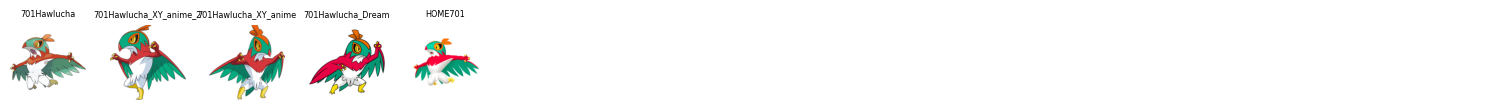

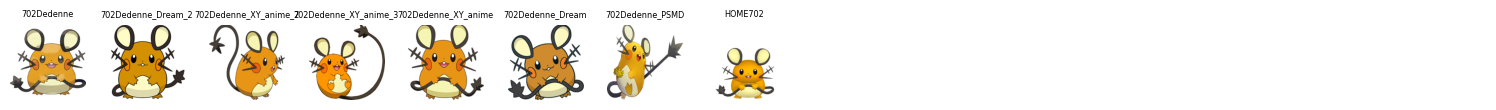

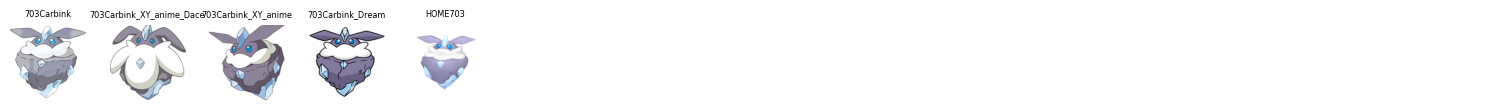

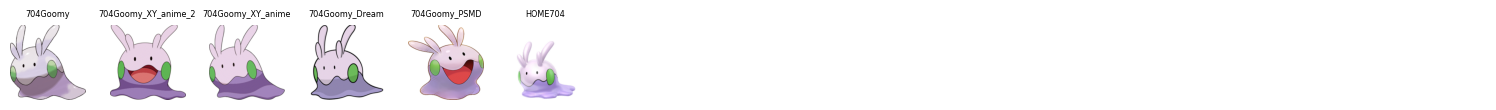

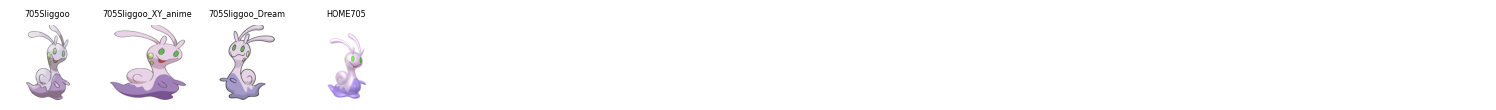

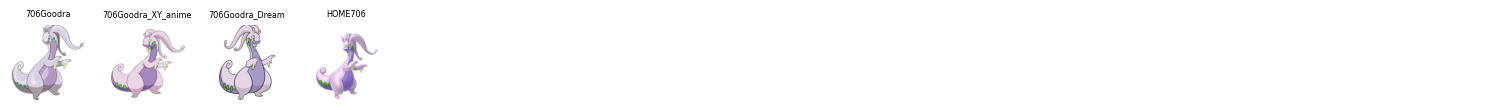

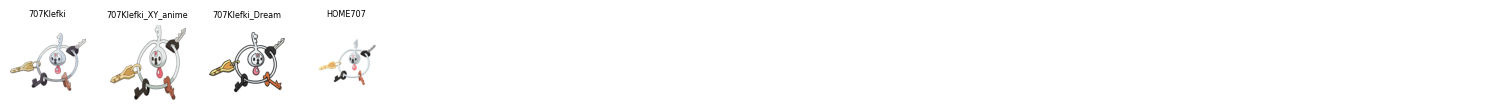

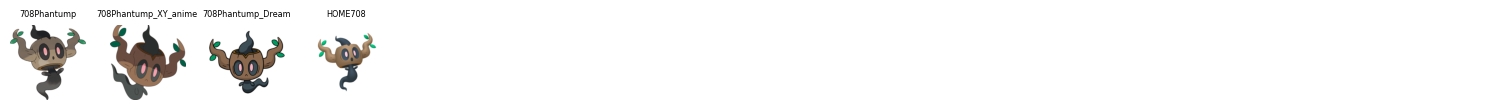

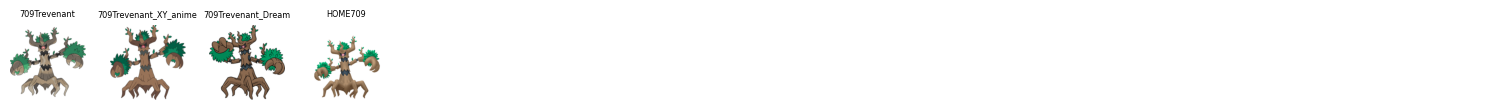

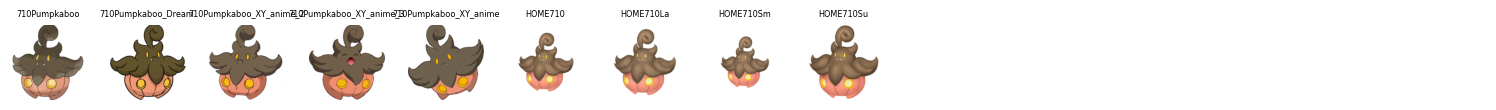

In [244]:
# SKIP FOR NOW, THEN COME BACK AFTER RUNNING THE REST OF THE noTEBOOK.
## You can run this cell a bunch in a row! 
## it will show you some images.
## then you can edit blacklists above to reflect changes
NN = 10
#get_and_show_random(ishow, NOSPRITES=False)[0][0]  #Use this line to re-do the previously picked poke (useful if editting blacklists.)
print(runN)
for i in range(NN):
    get_and_show_random(runN+i, NOSPRITES=True, figsize=(1,1), Ncol=15, verbose=0)[0][0]
runN+=NN

In [120]:
direc = 'dataset/scraped/'

In [24]:
import DataProcessing as dp
csvdata, cc = dp.read_csv(dp.CSVFILE2)

Took  0.01 seconds to read data from dataset/Pokedex_Ver6.csv


In [25]:
nl = NamesList('Jirachi', direc, csvdata=csvdata)

In [26]:
gs = ip.get_some_images_and_reshape(direc+'Jirachi', imnames = nl.get_files(), verbose=3,
                                    some=np.inf, shape=(150,150), exclude_smaller=True, return_filesread=True)

Got  17 of the  27 images in  0.59 seconds (from folder = dataset/scraped/Jirachi).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)
 >> List of excluded files and reasons for exclusion:
                 too small | 011-Spr_3r_385.png
                 too small | 013-Spr_3e_385.png
                 too small | 015-Spr_b_4d_385b.png
                 too small | 017-Spr_4d_385.png
                 too small | 019-Spr_5b_385.png
                 too small | 027-Spr_b_3r_385.png
                 too small | 029-Spr_b_4d_385.png
                 too small | 030-Spr_b_4p_385.png
                 too small | 032-Spr_b_5b_385.png
                 too small | 041-385.png


In [27]:
names = NamesList(gs[1], False, name='Jirachi', number=nl.number).get_names()

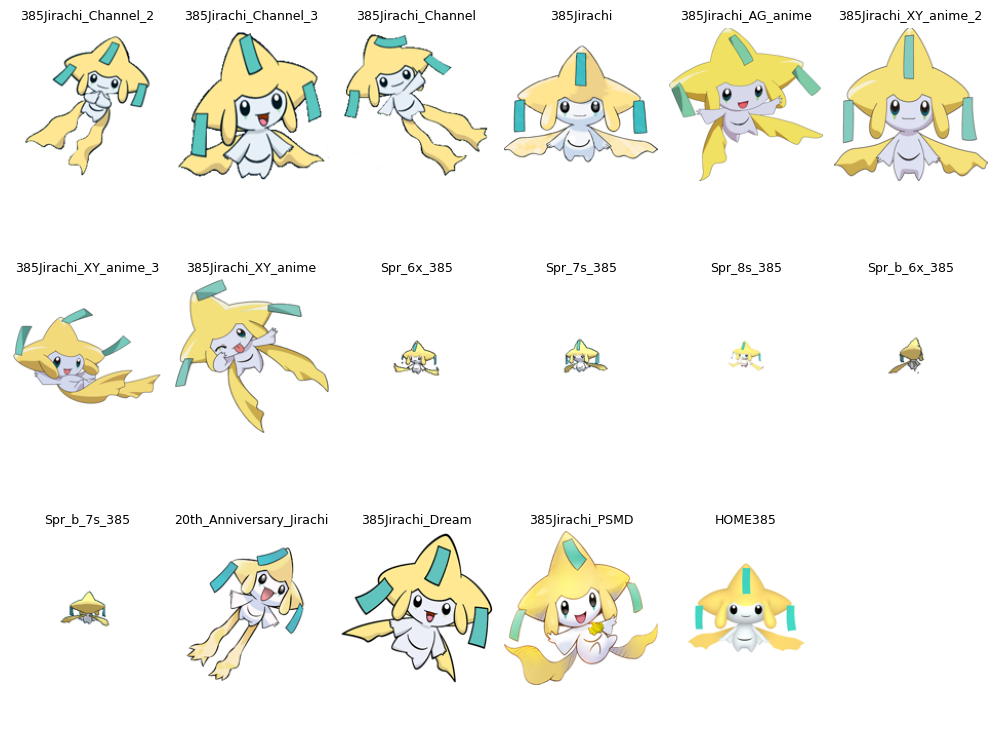

In [28]:
Nplot = len(names)
Ncol = 6
Nrow = int(np.ceil(Nplot/Ncol))
fig, axs = plt.subplots(Nrow, Ncol, figsize=(10,8))
for i in range(Ncol):
    for j in range(Nrow):
        plt.sca(axs[j][i])
        plt.axis('off')
        idx = i + j * Ncol
        if idx < Nplot:
            plt.imshow(gs[0][idx])
            plt.title(names[idx])
plt.tight_layout()

In [117]:
def get_and_show_ims(poke, number=None, direc=direc, Ncol=6, verbose=3, figsize=(2,2), NOSPRITES=False, csvdata=None, **kwargs):
    '''show a grid of ims of poke; labeled with their filenames (without the extension & prefix).
    kwargs go to ip.get_some_images_and_reshape.
    '''
    nl = NamesList(poke, direc, number=number, csvdata=csvdata)
    if NOSPRITES: nl.blacklist_sprites()
    gs = ip.get_some_images_and_reshape(os.path.join(direc,poke), imnames=nl.get_files(), verbose=verbose,
                                        some=np.inf, return_filesread=True, **kwargs)
    names = NamesList(gs[1], False, name=poke, number=nl.number).get_names()
    Nplot = len(names)
    if Nplot<1:
        print('no good images for ({:}) {:}'.format(nl.number, nl.pokemon))
        return gs
    Nrow = int(np.ceil(Nplot/Ncol))
    fig, axs = plt.subplots(Nrow, Ncol, figsize=(figsize[0]*Ncol, figsize[1]*Nrow))
    for i in range(Ncol):
        for j in range(Nrow):
            if Nrow==1: plt.sca(axs[i])
            else:       plt.sca(axs[j][i])
            plt.axis('off')
            idx = i + j * Ncol
            if idx < Nplot:
                im = gs[0][idx]
                if np.max(im) > 5: im = im/ 255
                plt.imshow(im)
                plt.title(names[idx])
    plt.tight_layout()
    plt.show()
    return gs

Got  15 of the  27 images in  0.60 seconds (from folder = dataset/scraped/Jirachi).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)
 >> List of excluded files and reasons for exclusion:
                 too small | 001-385Jirachi_Channel_3.png
                 too small | 002-385Jirachi_Channel.png
                 too small | 011-Spr_3r_385.png
                 too small | 013-Spr_3e_385.png
                 too small | 015-Spr_b_4d_385b.png
                 too small | 017-Spr_4d_385.png
                 too small | 019-Spr_5b_385.png
                 too small | 027-Spr_b_3r_385.png
                 too small | 029-Spr_b_4d_385.png
                 too small | 030-Spr_b_4p_385.png
                 too small | 032-Spr_b_5b_385.png
                 too small | 041-385.png


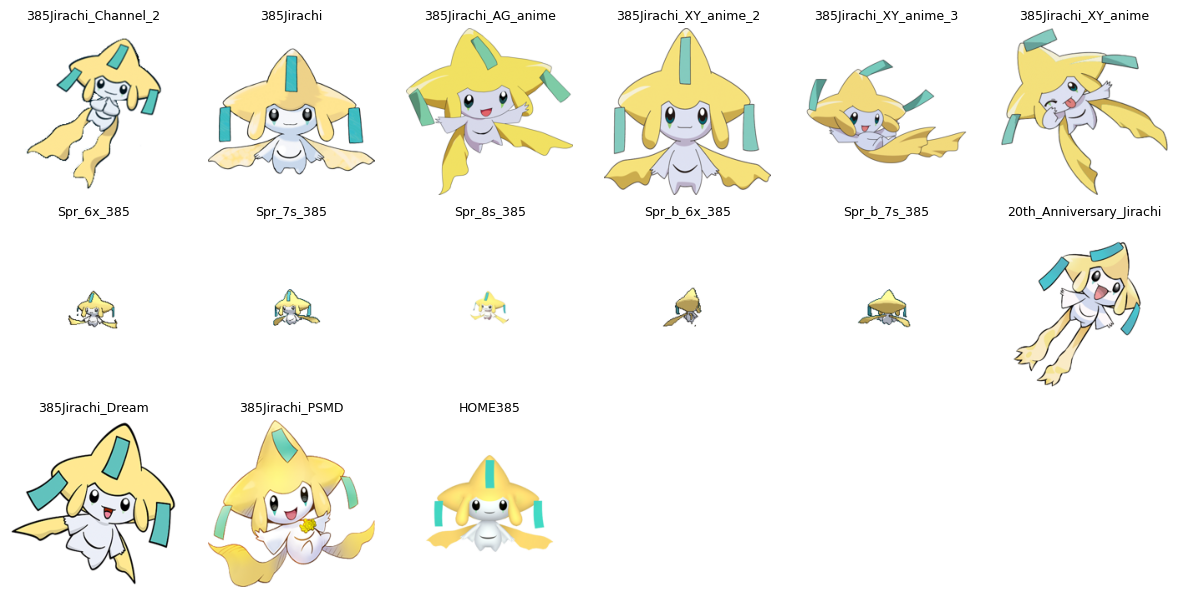

In [32]:
gasi = get_and_show_ims('Jirachi', csvdata=csvdata, shape=(200,200), exclude_smaller=True);

Got  13 of the  28 images in  1.07 seconds (from folder = dataset/scraped/Deoxys).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)


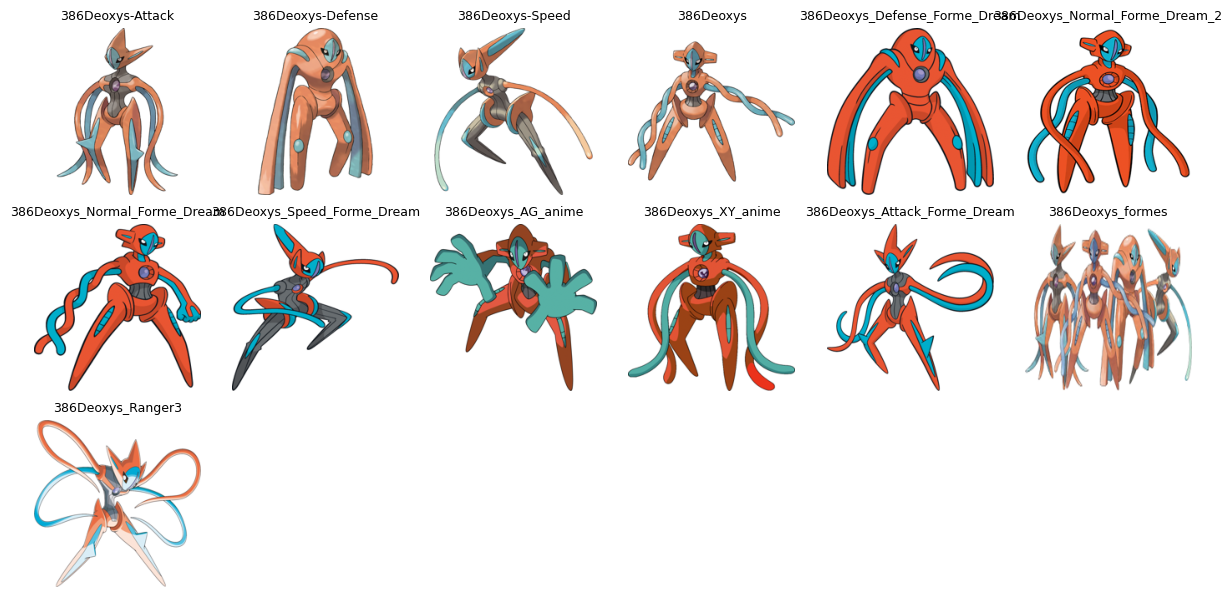

In [33]:
gasi = get_and_show_ims('Deoxys', csvdata=csvdata, shape=(200,200), exclude_smaller=True,
                        NOSPRITES=True, verbose=1);

Got  39 of the  48 images in  3.81 seconds (from folder = dataset/scraped/Pikachu).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)


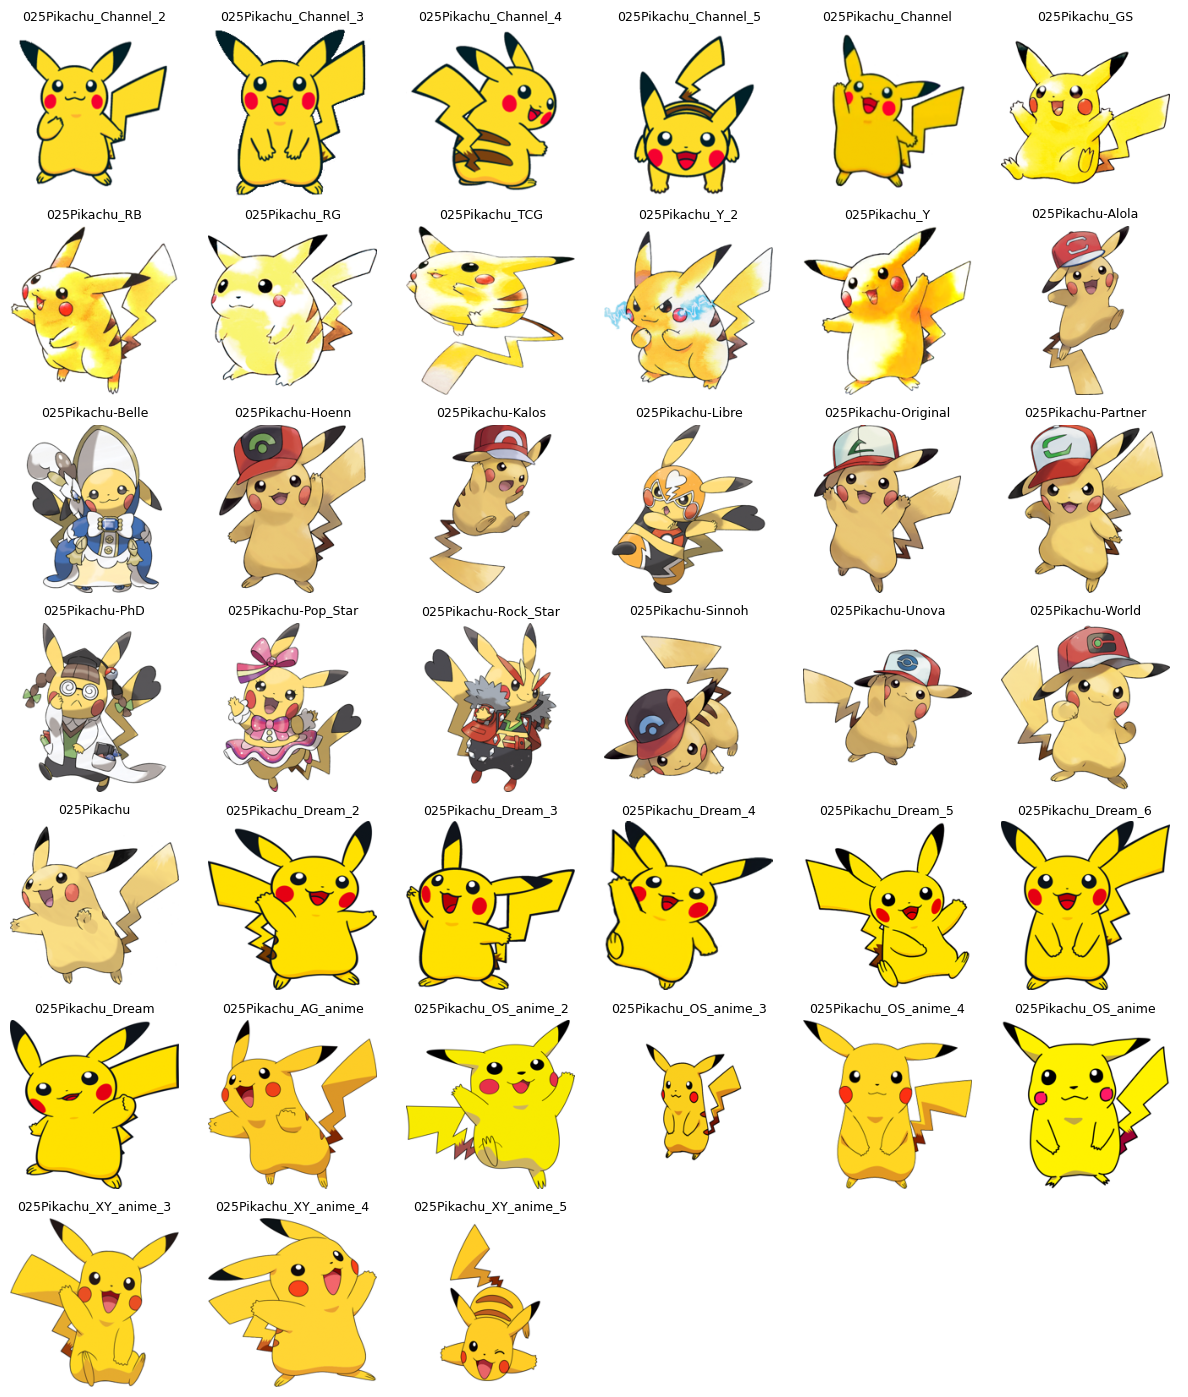

In [34]:
gasi = get_and_show_ims('Pikachu', csvdata=csvdata, shape=(200,200), exclude_smaller=True, 
                        NOSPRITES=True, verbose=1);

Got   7 of the   9 images in  0.58 seconds (from folder = dataset/scraped/Scorbunny).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)


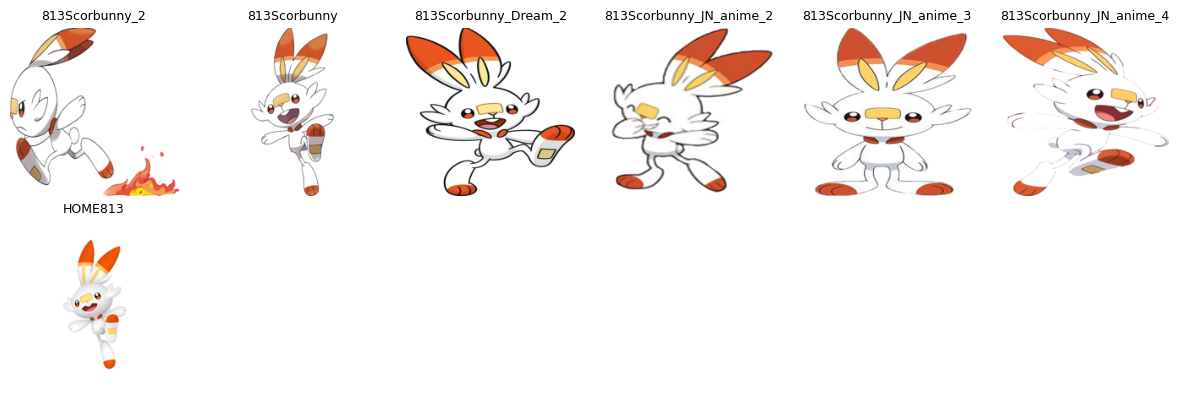

In [35]:
gasi = get_and_show_ims('Scorbunny', csvdata=csvdata, shape=(200,200), exclude_smaller=True, 
                        NOSPRITES=True, verbose=1);

Got   5 of the   6 images in  0.55 seconds (from folder = dataset/scraped/Sobble).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)


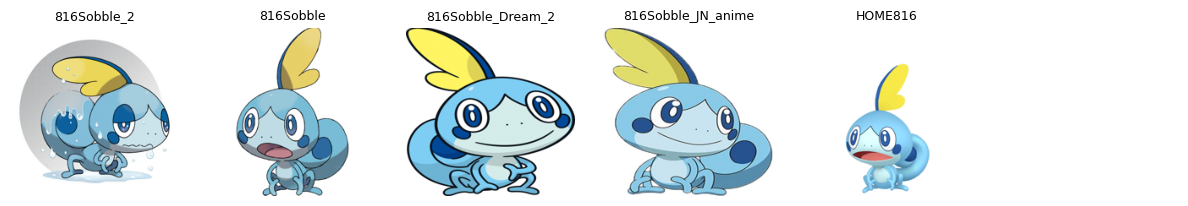

In [39]:
gasi = get_and_show_ims('Sobble', csvdata=csvdata, shape=(200,200), exclude_smaller=True, 
                        NOSPRITES=True, verbose=1);

In [56]:
pokerows    = csvdata[:,cc.CODE]=='1'
POKENAMES   = csvdata[:,cc.NAME][pokerows]
POKENUMBERS = csvdata[:,cc.NUMBER][pokerows]

def get_and_show_random(i=None, shape=(200,200), exclude_smaller=True, verbose=1, **kwargs):
    '''show all the images we will use, for a random pokemon!'''
    i = i if i is not None else np.random.randint(len(POKENAMES))
    return [i, POKENAMES[i], POKENUMBERS[i]], \
            get_and_show_ims(POKENAMES[i], number=POKENUMBERS[i], shape=shape, exclude_smaller=exclude_smaller, verbose=verbose, **kwargs)

Got  12 of the  17 images in  0.84 seconds (from folder = dataset/scraped/Raichu).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)


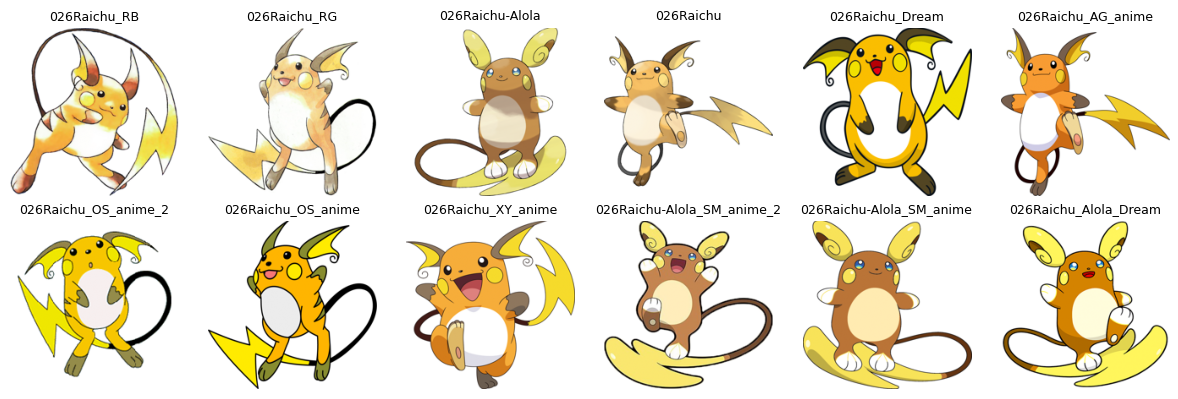

In [84]:
## You can run this cell a bunch in a row!

#get_and_show_random(ishow, NOSPRITES=False)[0][0]  #Use this line to re-do the previously picked poke (useful if editting blacklists.)
ishow = get_and_show_random(NOSPRITES=True)[0][0]


In [ ]:
#TODO: some type of resizing which is not naive
#i.e. can find the tight box around the poke even when there are many constant pixels around it (e.g. for some sprite images.)

In [262]:
import ScrapedLoading as sl

In [264]:
reload(sl)

<module 'ScrapedLoading' from '/Users/Sevans/Python/ProjectOAK/ScrapedLoading.py'>

Got   8 of the  10 images in  0.37 seconds (from folder = dataset/scraped/Abra).
(Some images were excluded. More info via verbose>1, return_filesread=True, or return_exclusion_info=True.)


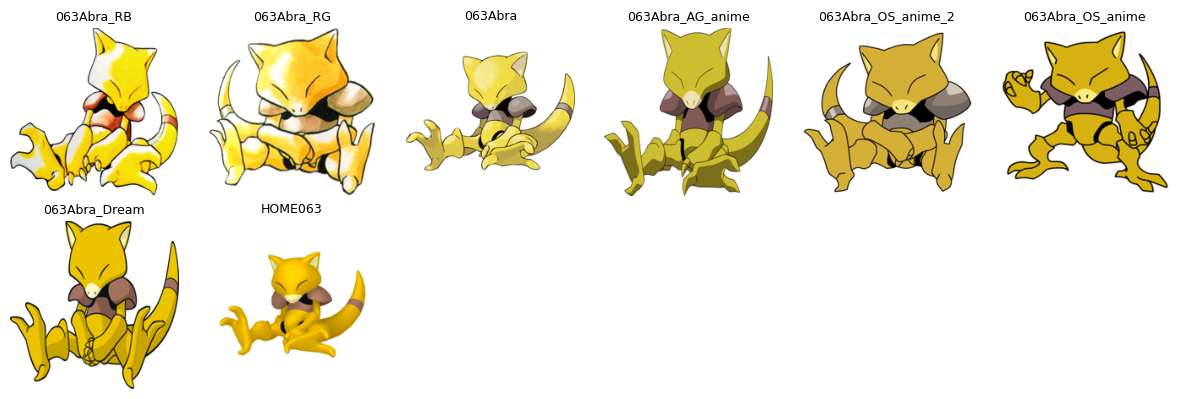

In [270]:
gasi = get_and_show_ims('Abra', csvdata=csvdata, shape=(200,200), exclude_smaller=True, 
                        NOSPRITES=True, verbose=1);

In [27]:
""" This part writes all filenames to a single file. It is not used by the code in this notebook, but it can be convenient.
NL4 = sl.NamesLists(dp.IMAGESFOLDER4, NOSPRITES=True, csvdata=csvdata)
#NL4 = sl.NamesLists(direc_save, csvdata=csvdata)   #after running pt2 of this cell
with open('Filenames.txt', 'w') as f:
#with open('Filenames_200.txt', 'w') as f:          #after running pt2 of this cell
    for key in sorted(NL4.keys()):
        for folder in NL4[key].get_files():
            f.write(os.path.join(key, folder)+'\n')
#also I manually deleted the last line (a blank line) in that file, after realizing it could cause errors if attempted to load as a file.
#""";

""" This part saves all GOOD images as 200x200 images in a directory 'datasets/scraped_cleaned_200'
#it only saves images whose original sizes are >= 200x200.
import PIL

direc_load = 'dataset/scraped'
direc_save = 'dataset/scraped_cleaned_200'
shapesave = (200,200)

def savePIL(data, fname):
    direc = os.path.split(fname)[0]
    if not os.path.exists(direc):
        os.mkdir(direc)
    data.save(os.path.join(fname))

def _print_clear(N=80): print('\r'+' '*N+'\r',end='')    

with open('Filenames.txt', 'r') as f:
    s = f.read()
fnames = s.split('\n')

L = len(fnames)
ssize = shapesave[0] * shapesave[1]
for i in range(len(fnames)):
    fname=fnames[i]
    _print_clear(10)
    print(i,'of',L, end='')
    data = PIL.Image.open(os.path.join(direc_load, fname))
    if data.size[0] * data.size[1] >= ssize:
        data = data.resize(shapesave)
        savePIL(data, os.path.join(direc_save, fname))
#""";

Took  0.28 seconds to get filenames
